**HEART DISEASE PREDICTION PROJECT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('health.csv')

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.drop(['education'],axis =1, inplace=True)

In [ ]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# df.drop(['glucose'],axis =1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [ ]:
df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

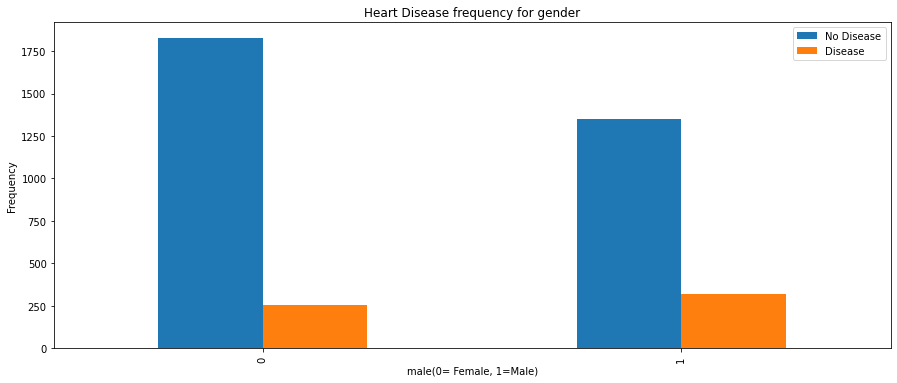

In [ ]:
pd.crosstab(df.male, df.TenYearCHD).plot(kind='bar',figsize=(15,6))
plt.title('Heart Disease frequency for gender')
plt.xlabel('male(0= Female, 1=Male)')
plt.legend(['No Disease','Disease'])
plt.ylabel('Frequency')
plt.show()

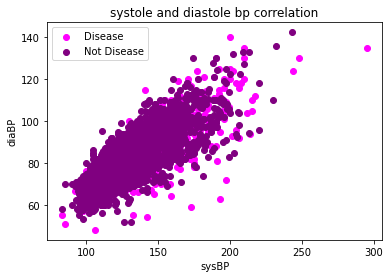

In [ ]:
plt.scatter(x=df.sysBP[df.TenYearCHD==1],y=df.diaBP[df.TenYearCHD==1],c='magenta')
plt.scatter(x=df.sysBP[df.TenYearCHD==0],y=df.diaBP[df.TenYearCHD==0],c='purple')
plt.legend(['Disease','Not Disease'])
plt.xlabel('sysBP')
plt.ylabel('diaBP')
plt.title('systole and diastole bp correlation')
plt.show()

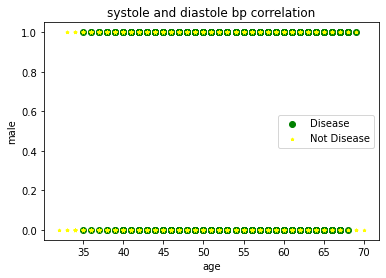

In [ ]:
plt.scatter(x=df.age[df.TenYearCHD==1],y=df.male[df.TenYearCHD==1],c='green')
plt.scatter(x=df.age[df.TenYearCHD==0],y=df.male[df.TenYearCHD==0],c='yellow',marker='*',s=8)
plt.legend(['Disease','Not Disease'])
plt.xlabel('age')
plt.ylabel('male')
plt.title('systole and diastole bp correlation')
plt.show()

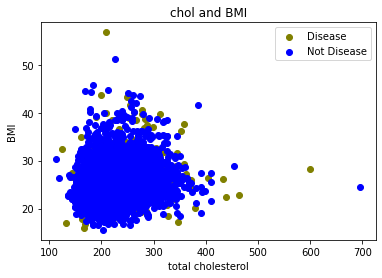

In [ ]:
plt.scatter(x=df.totChol[df.TenYearCHD==1],y=df.BMI[df.TenYearCHD==1],c='olive')
plt.scatter(x=df.totChol[df.TenYearCHD==0],y=df.BMI[df.TenYearCHD==0],c='blue')
plt.legend(['Disease','Not Disease'])
plt.xlabel('total cholesterol')
plt.ylabel('BMI')
plt.title('chol and BMI')
plt.show()

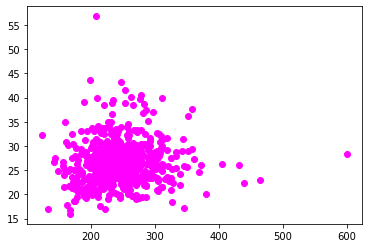

In [ ]:
plt.scatter(x=df.totChol[df.TenYearCHD==1],y=df.BMI[df.TenYearCHD==1],c='magenta')

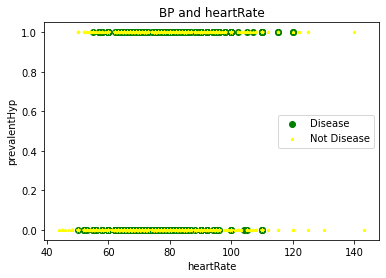

In [ ]:
plt.scatter(x=df.heartRate [df.TenYearCHD==1],y=df.prevalentHyp[df.TenYearCHD==1],c='green')
plt.scatter(x=df.heartRate [df.TenYearCHD==0],y=df.prevalentHyp[df.TenYearCHD==0],c='yellow',marker='*',s=8)
plt.legend(['Disease','Not Disease'])
plt.xlabel('heartRate')
plt.ylabel('prevalentHyp')
plt.title('BP and heartRate')
plt.show()

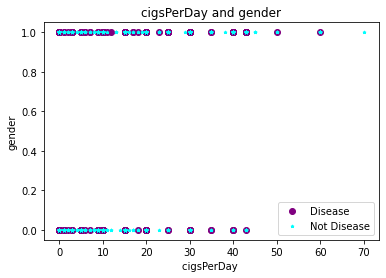

In [ ]:
plt.scatter(x=df.cigsPerDay  [df.TenYearCHD==1],y=df.male[df.TenYearCHD==1],c='purple')
plt.scatter(x=df.cigsPerDay  [df.TenYearCHD==0],y=df.male[df.TenYearCHD==0],c='cyan',marker='*',s=8)
plt.legend(['Disease','Not Disease'])
plt.xlabel('cigsPerDay ')
plt.ylabel('gender')
plt.title('cigsPerDay and gender')
plt.show()

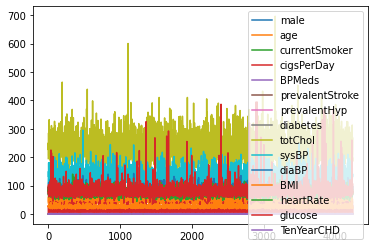

In [ ]:
df.plot(kind='line')

# Feature Selection


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

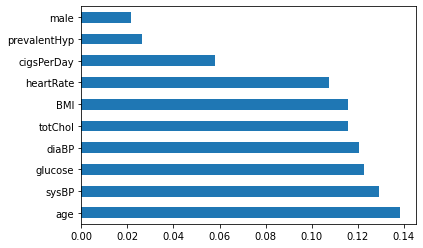

In [ ]:
model = ExtraTreesRegressor()
feat_imp = model.fit(x,y)
feat_imp.feature_importances_
imp = pd.Series(feat_imp.feature_importances_,index=x.columns)
imp.nlargest(10).plot(kind='barh')

In [ ]:
x = np.asarray(df[['prevalentHyp','cigsPerDay','male','heartRate','totChol','BMI','diaBP','glucose','sysBP','age']])
y = np.asarray(df['TenYearCHD'])

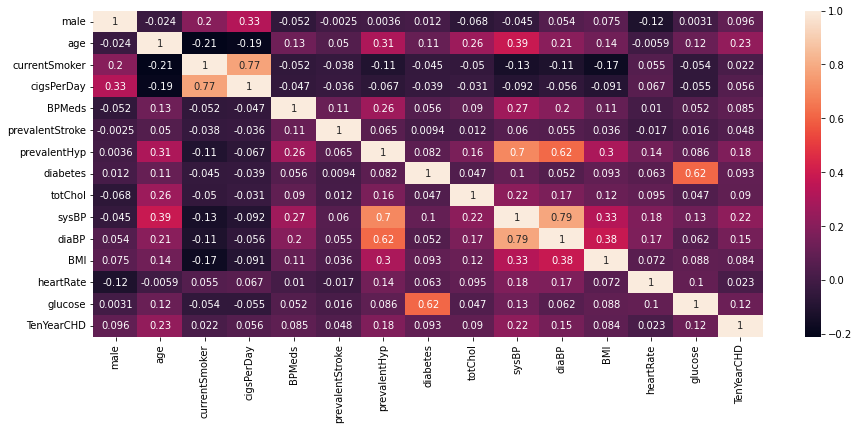

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [ ]:
x

array([[-0.67328498, -0.75552698,  1.11629198, ..., -0.20436458,
        -1.19619549, -1.23390951],
       [-0.67328498, -0.75552698, -0.89582297, ..., -0.24624229,
        -0.51572536, -0.4170173 ],
       [-0.67328498,  0.9218319 ,  1.11629198, ..., -0.49750858,
        -0.22085497, -0.18361952],
       ...,
       [-0.67328498, -0.75552698, -0.89582297, ...,  1.05196682,
         0.05133307,  0.28317603],
       [ 1.48525517, -0.75552698,  1.11629198, ..., -0.41375315,
         0.39156814, -1.11721063],
       [-0.67328498,  1.76051134, -0.89582297, ..., -0.07873144,
         0.02865074, -1.23390951]])

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.mean(result))

0.6273939947250964


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.median(result))

0.6242138364779874


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.mean(result))

0.8963506177971091


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.median(result))

0.8977183320220299


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.mean(result))

0.8211729732939448


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.median(result))

0.8183962264150944


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.mean(result))

0.7909758819134144


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.median(result))

0.8034591194968553


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.mean(result))

0.6753650619281604


In [ ]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
skfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model,x_sm,y_sm, cv = skfold)
print(np.median(result))

0.6768867924528302
